In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

datos_completo = pd.read_csv('/home/soledad-escobar/Descargas/Orga_datos/csv_files/events.csv')

/home/soledad-escobar/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
datos_completo.shape

(1011288, 23)

In [9]:
datos_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [10]:
eventos = datos_completo['event']
eventos.value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [11]:
#veamos de donde provienen los usuarios del sitio
df_con_region = datos_completo.loc[pd.notnull(datos_completo['region'])] #saco los que no tienen region
df_personas_con_region = df_con_region.drop_duplicates(subset='person') #saco todos los duplicados de cada usuario
paises_por_cada_usuario = df_personas_con_region['country']
paises_por_cada_usuario.value_counts().head()

Brazil           25768
Unknown            716
United States      297
Argentina           24
Canada              10
Name: country, dtype: int64

In [12]:
#analizamos las ciudades de Brasil donde estan la gran mayoria de los usuarios
df_usuarios_brasil = df_personas_con_region.loc[df_personas_con_region['country'] == 'Brazil']
ciudades_usuarios_brasil = df_usuarios_brasil['city']
cantidad_de_usuarios_brasil_por_ciudad = ciudades_usuarios_brasil.value_counts()[1:11] #Saco a Unknown
cantidad_de_usuarios_brasil_por_ciudad

São Paulo         3532
Rio de Janeiro    1153
Belo Horizonte     748
Salvador           746
Brasília           452
Fortaleza          375
Curitiba           370
Recife             307
Osasco             282
Porto Alegre       281
Name: city, dtype: int64

Text(0,0.5,'Cantidad de usuarios')

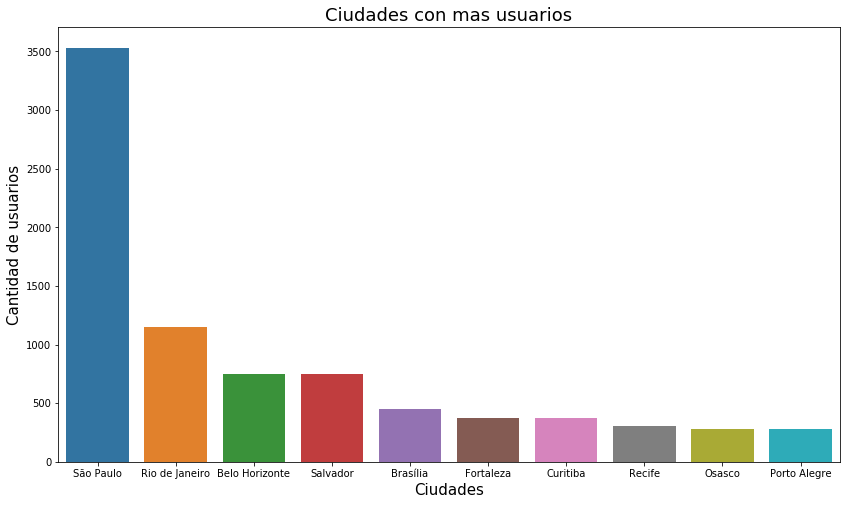

In [13]:
plt.subplots(figsize=(14,8))
bp = sns.barplot(x=cantidad_de_usuarios_brasil_por_ciudad.index, y= cantidad_de_usuarios_brasil_por_ciudad.values)
bp.set_title("Ciudades con mas usuarios", fontsize=18)
bp.set_xlabel("Ciudades", fontsize=15)
bp.set_ylabel("Cantidad de usuarios", fontsize=15)

Text(0,0.5,'Leads')

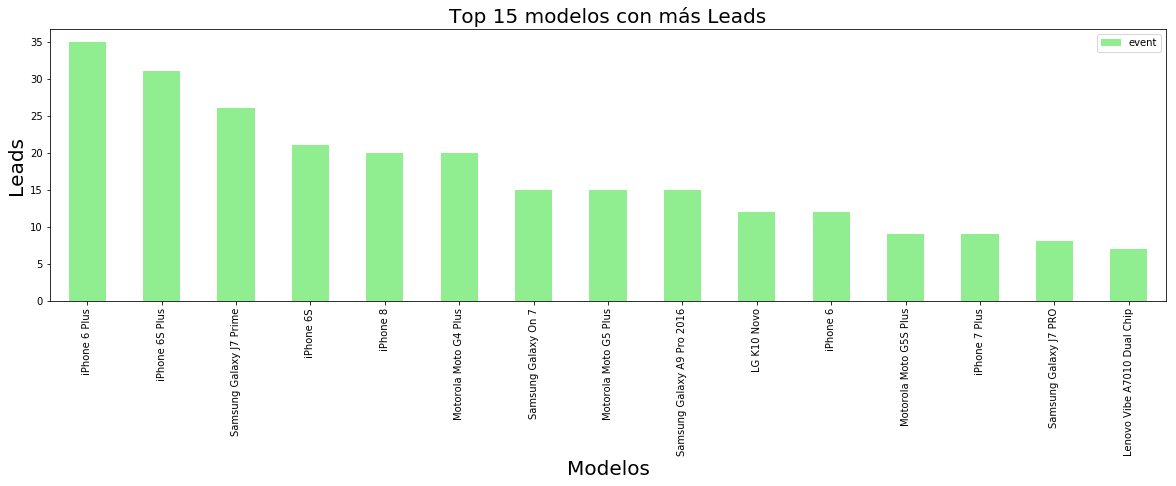

In [14]:
leads_por_model = datos_completo.loc[:, ['event', 'model']].groupby('event').get_group('lead').groupby('model').count().sort_values('event', ascending = False)
leads_por_model.head(15)
#15 modelos con mas leads 
graf1 = leads_por_model.head(15).plot(kind = 'bar', figsize = (20,5), color = 'lightgreen')
graf1.set_title('Top 15 modelos con más Leads', fontsize = 20)
graf1.set_xlabel('Modelos', fontsize = 20)
graf1.set_ylabel('Leads', fontsize = 20)

In [15]:
#personas que realizaron checkouts y conversiones 
events = datos_completo.groupby('event')
checkouts =pd.DataFrame(events.get_group('checkout'))
conversiones = pd.DataFrame(events.get_group('conversion'))
dataCC = pd.merge(conversiones, checkouts, on = 'person', how = 'inner')
dataCC.head()

,timestamp_x,event_x,person,url_x,sku_x,model_x,condition_x,storage_x,color_x,skus_x,...,search_engine_y,channel_y,new_vs_returning_y,city_y,region_y,country_y,device_type_y,screen_resolution_y,operating_system_version_y,browser_version_y
0,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-03-20 17:46:12,conversion,00204059,NaN,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Modelo')

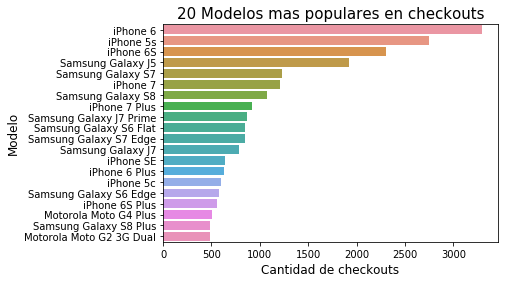

In [16]:
#Modelos mas populares en checkouts
cktModel = checkouts['model'].value_counts().head(20)
g = sns.barplot(x=cktModel.values, y=cktModel.index, orient='h')
g.set_title("20 Modelos mas populares en checkouts", fontsize=15)
g.set_xlabel("Cantidad de checkouts", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)

Text(0,0.5,'Modelo')

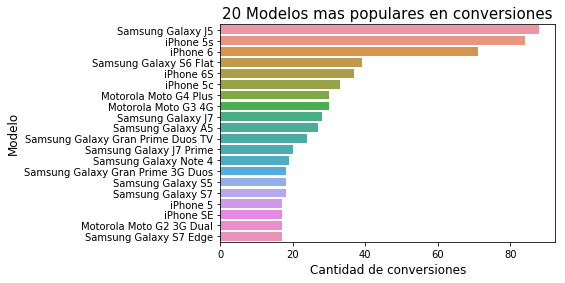

In [17]:
#Modelos mas populares en conversiones
convModel = conversiones['model'].value_counts().head(20)
g = sns.barplot(x=convModel.values, y=convModel.index, orient='h')
g.set_title("20 Modelos mas populares en conversiones", fontsize=15)
g.set_xlabel("Cantidad de conversiones", fontsize=12)
g.set_ylabel("Modelo", fontsize=12)

In [20]:
#cantidad de personas por evento en cada una de las fechas 
cont = datos_completo.groupby(['timestamp', 'event']).count()
contEvents = cont.pivot_table(index = 'timestamp', columns = 'event', values = 'person')
contEvents.groupby('timestamp').head()
persEvent = contEvents.fillna(0)
new1 = persEvent.reset_index()
#Agrego dias y meses
new1['timestamp'] = pd.to_datetime(new1['timestamp'], format='%Y%m%d %H:%M:%S.%f')
new1['mes'] = new1['timestamp'].dt.month
new1['dia'] = new1['timestamp'].dt.day

In [21]:
# Calculo el promedio de personas que asisten a eventos 
new1['prom_event'] = new1.filter(items = ['ad campaign hit', 'brand listing','checkout', 'conversion', 'generic listing','lead', 'search engine hit', 'searched products', 'staticpage', 'viewed product', 'visited site']).apply(np.mean, axis = 1)

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
mes,,,,,,,,,,,
1,0.103177,0.118392,0.020065,0.003819,0.104328,0.001940,0.060803,0.081292,0.008366,0.536554,0.129425
2,0.098818,0.130954,0.018623,0.003125,0.086064,0.000929,0.056503,0.063640,0.004434,0.596706,0.117821
3,0.105184,0.129934,0.021214,0.004056,0.084995,0.001056,0.050311,0.061378,0.006872,0.607136,0.110924
4,0.100040,0.139228,0.018055,0.002903,0.090972,0.001250,0.051830,0.062121,0.006000,0.605902,0.116230
5,0.104413,0.123272,0.042866,0.000962,0.083491,0.000244,0.066468,0.071452,0.004129,0.694059,0.109973


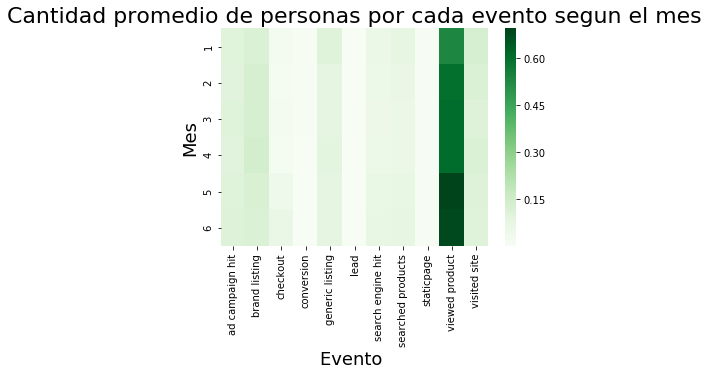

In [27]:
for_heatmap = new1.set_index('mes').groupby('mes').mean()
del for_heatmap['prom_event']
del for_heatmap['dia']
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title("Cantidad promedio de personas por cada evento segun el mes", fontsize=22)
g.set_xlabel("Evento ",fontsize=18)
g.set_ylabel("Mes", fontsize=18)
for_heatmap.head()

mes,1,2,3,4,5,6
dia,,,,,,
1,0.131818,0.108594,0.108285,0.109202,0.109087,0.120445
2,0.107544,0.106769,0.106875,0.108553,0.110820,0.118555
3,0.104488,0.109388,0.107076,0.106061,0.111165,0.118472
4,0.107111,0.109246,0.111978,0.107417,0.110392,0.123260
5,0.101310,0.108413,0.110604,0.106851,0.108832,0.124850


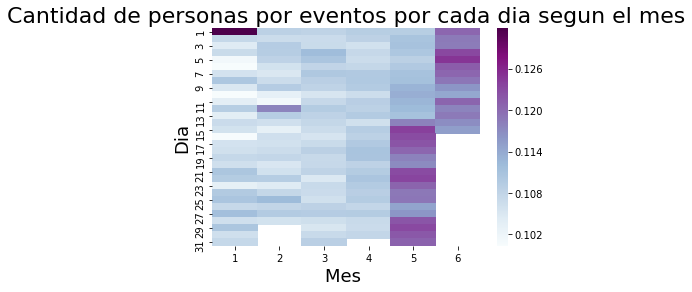

In [28]:
new = new1.pivot_table(index = 'dia', columns = 'mes', values = 'prom_event')
g = sns.heatmap(new,  cmap="BuPu", )
g.set_title("Cantidad de personas por eventos por cada dia segun el mes", fontsize=22)
g.set_xlabel("Mes ",fontsize=18)
g.set_ylabel("Dia", fontsize=18)
new.head()